In [ ]:
import numpy as np
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.metrics import silhouette_score
import scipy.cluster.hierarchy as shc
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
data=pd.read_csv('/content/Online Sales Data.csv')

In [ ]:
data.head()

,Transaction ID,Date,Product Category,Product Name,Units Sold,Unit Price,Total Revenue,Region,Payment Method
0,10001,2024-01-01,Electronics,iPhone 14 Pro,2,999.99,1999.98,North America,Credit Card
1,10002,2024-01-02,Home Appliances,Dyson V11 Vacuum,1,499.99,499.99,Europe,PayPal
2,10003,2024-01-03,Clothing,Levi's 501 Jeans,3,69.99,209.97,Asia,Debit Card
3,10004,2024-01-04,Books,The Da Vinci Code,4,15.99,63.96,North America,Credit Card
4,10005,2024-01-05,Beauty Products,Neutrogena Skincare Set,1,89.99,89.99,Europe,PayPal


In [ ]:
# Check for missing values
missing_values = data.isnull().sum()
print(missing_values)

Transaction ID      0
Date                0
Product Category    0
Product Name        0
Units Sold          0
Unit Price          0
Total Revenue       0
Region              0
Payment Method      0
dtype: int64


In [ ]:
# Check for duplicates
duplicates = data.duplicated().sum()
print(duplicates)

0


In [ ]:
# Encode categorical values
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

categorical_cols = data.select_dtypes(include=['object']).columns
for col in categorical_cols:
    data[col] = label_encoder.fit_transform(data[col])
data.head()

,Transaction ID,Date,Product Category,Product Name,Units Sold,Unit Price,Total Revenue,Region,Payment Method
0,10001,0,3,230,2,999.99,1999.98,2,0
1,10002,1,4,59,1,499.99,499.99,1,2
2,10003,2,2,115,3,69.99,209.97,0,1
3,10004,3,1,182,4,15.99,63.96,2,0
4,10005,4,0,131,1,89.99,89.99,1,2


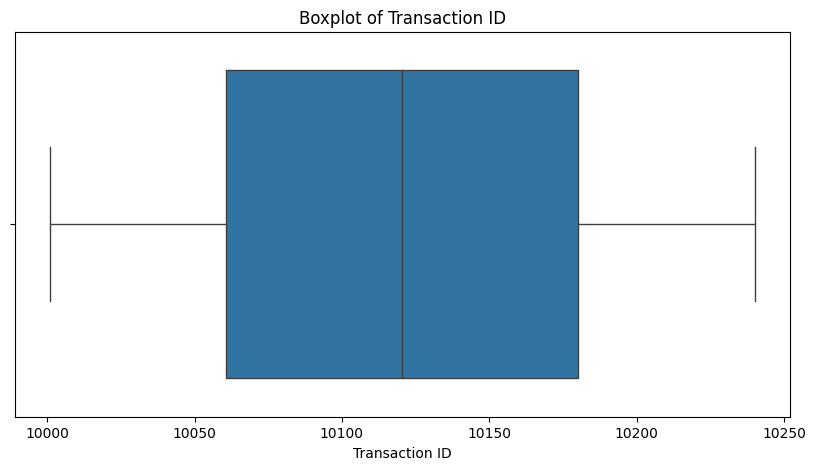

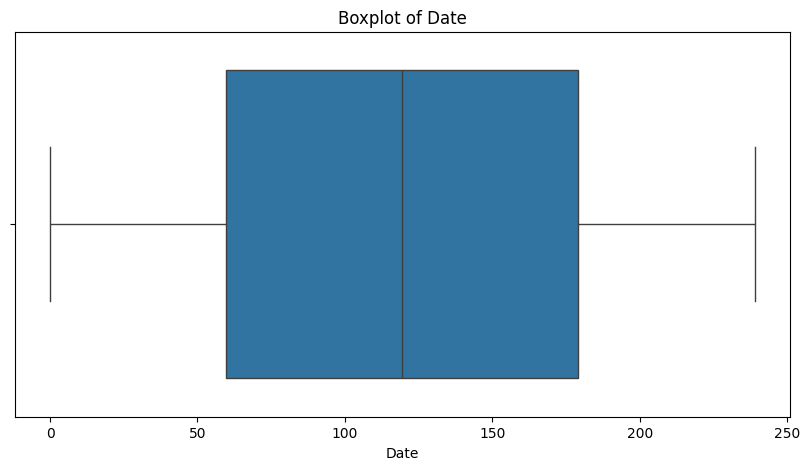

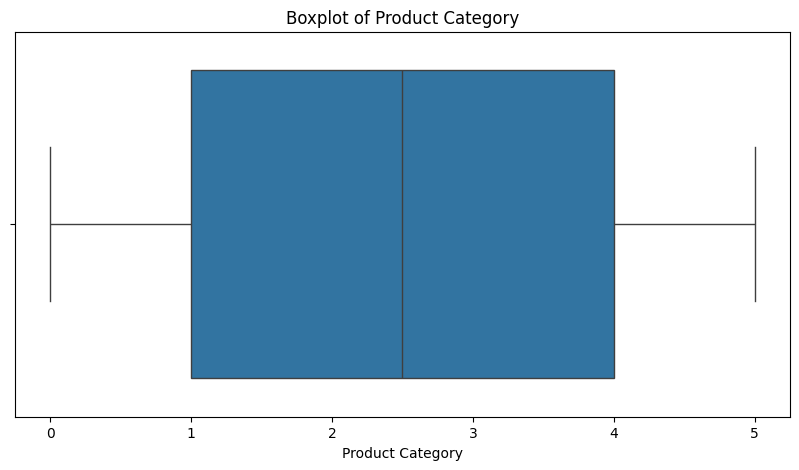

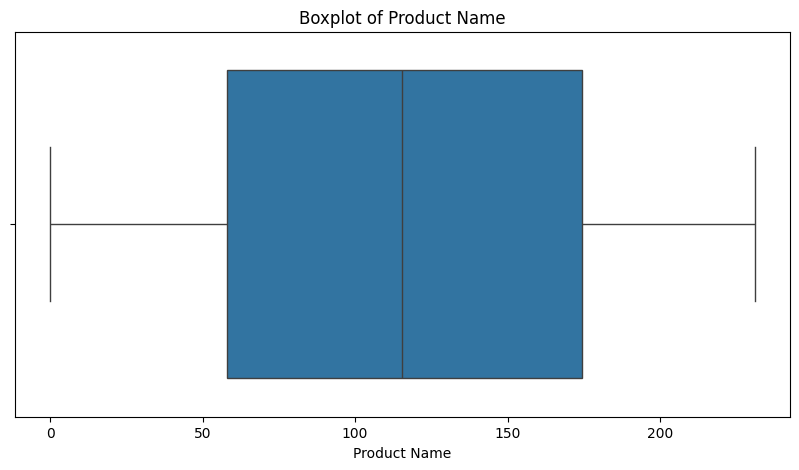

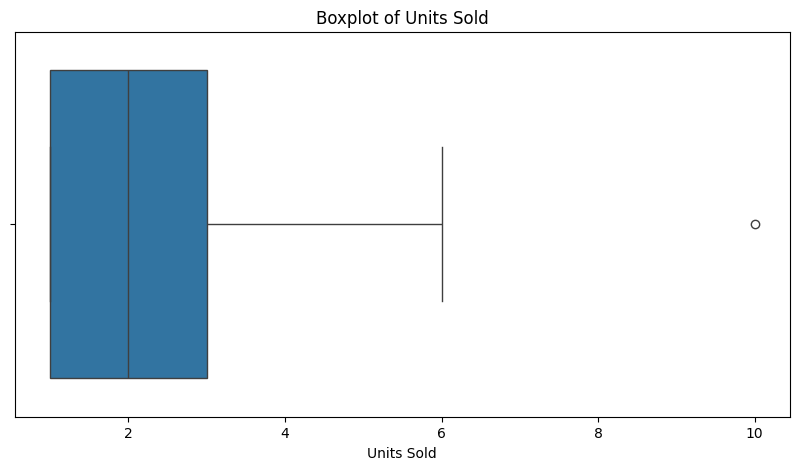

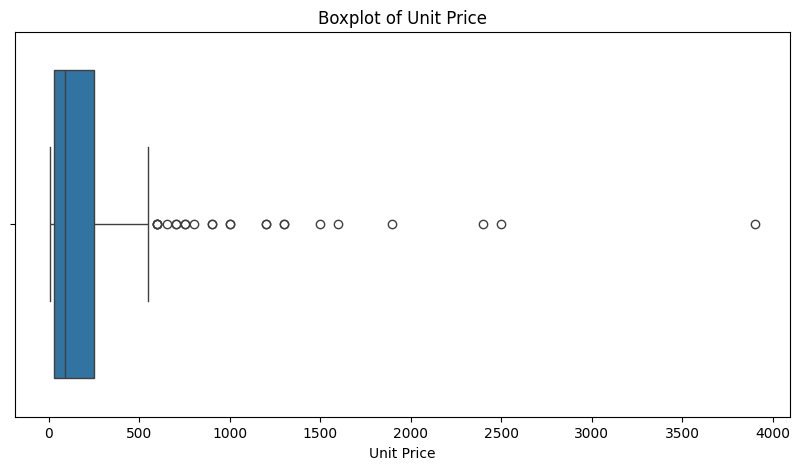

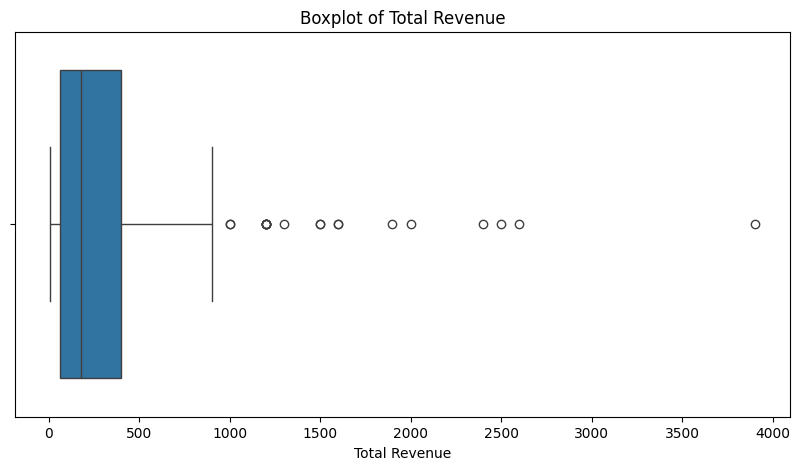

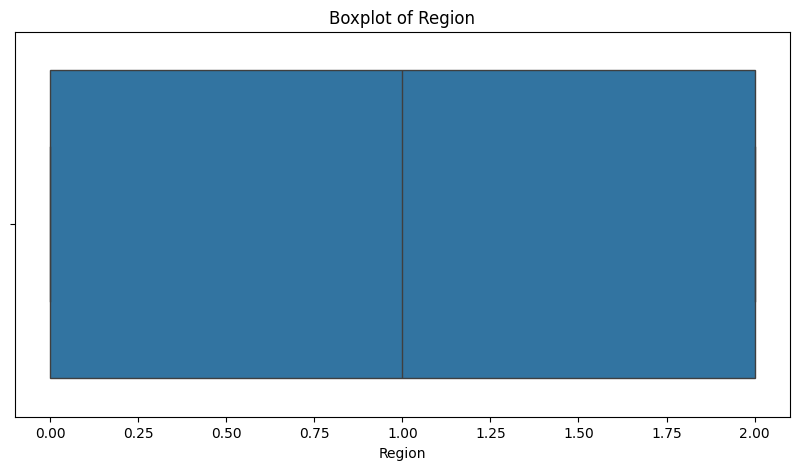

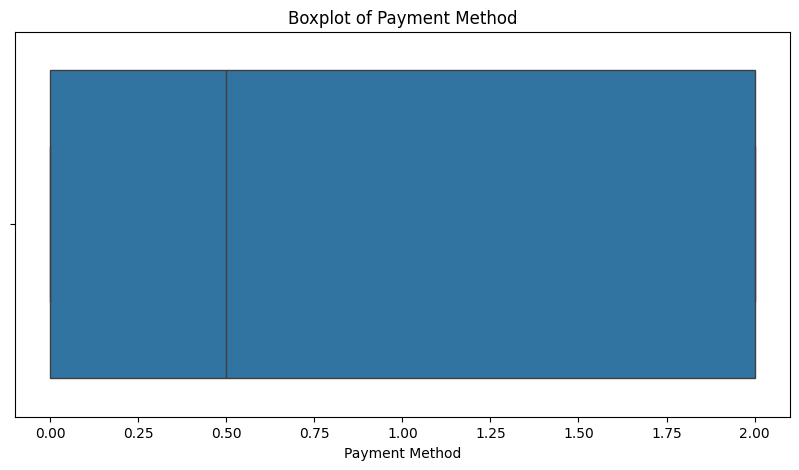

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot boxplots for numerical features
numerical_features = data.select_dtypes(include=['float64', 'int64']).columns

for feature in numerical_features:
    plt.figure(figsize=(10, 5))
    sns.boxplot(x=data[feature])
    plt.title(f'Boxplot of {feature}')
    plt.show()



In [ ]:
# Handling outliers by capping them (you can also use other methods)
for feature in numerical_features:
    Q1 = data[feature].quantile(0.25)
    Q3 = data[feature].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    data[feature] = data[feature].clip(lower=lower_bound, upper=upper_bound)


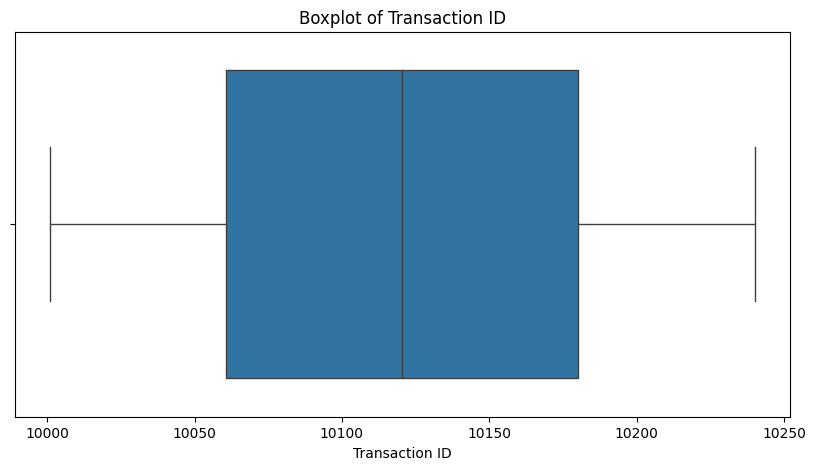

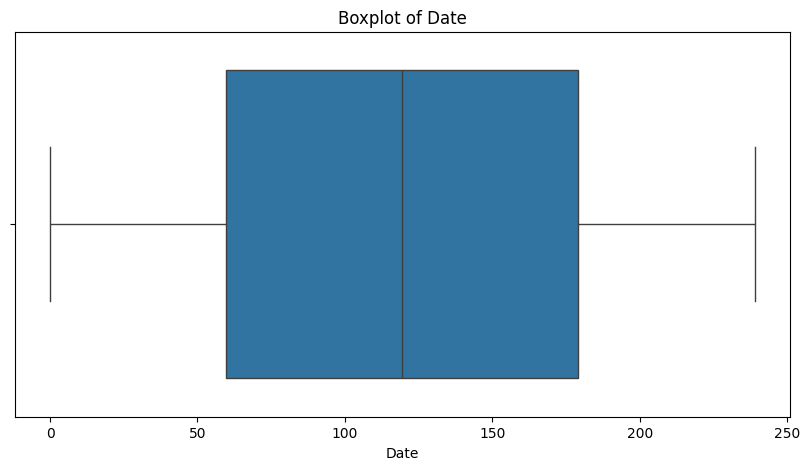

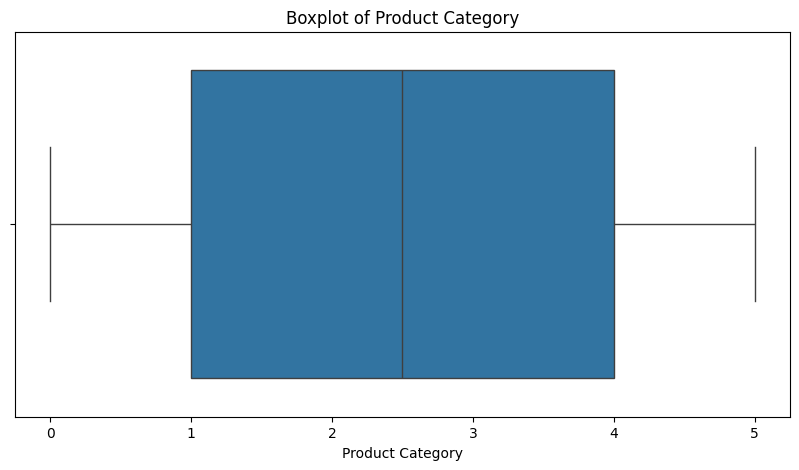

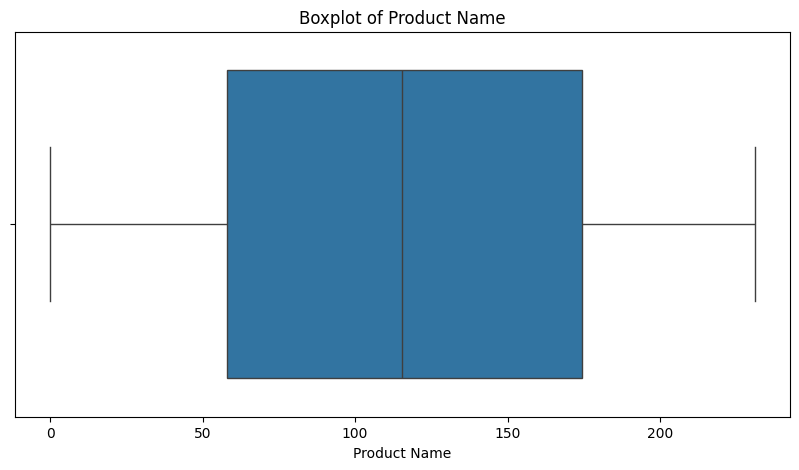

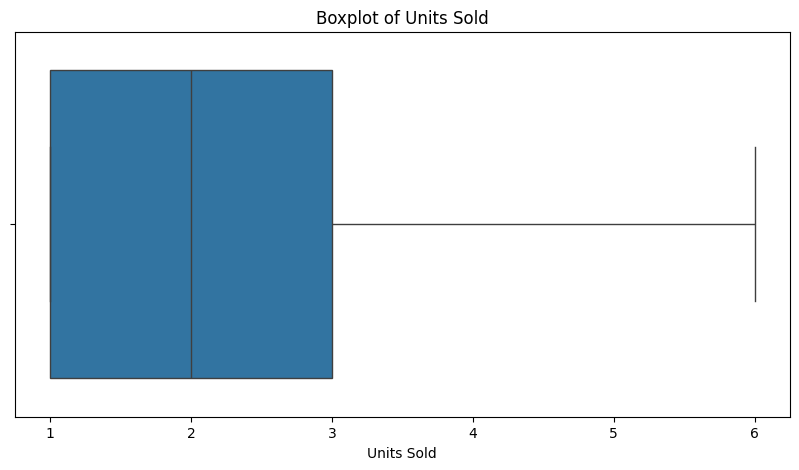

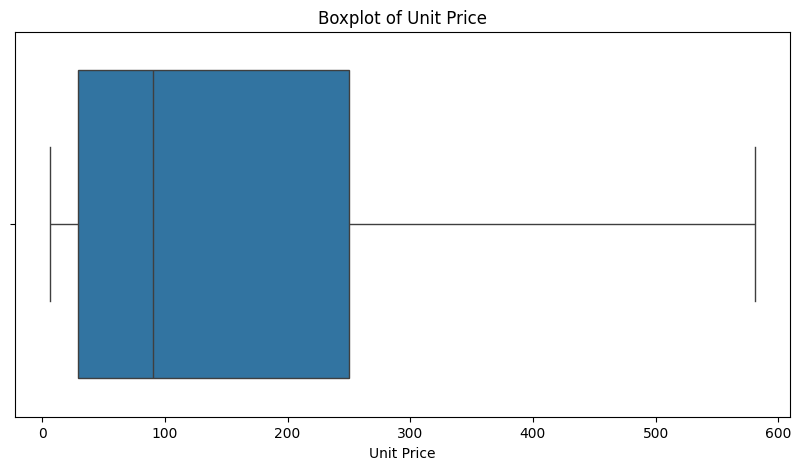

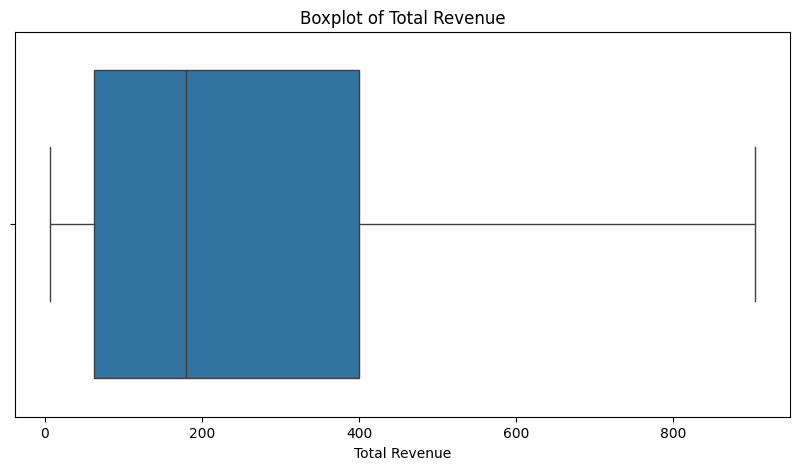

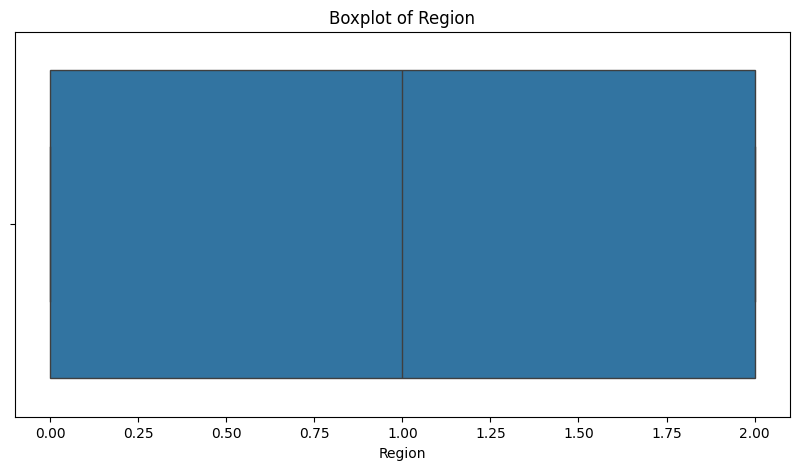

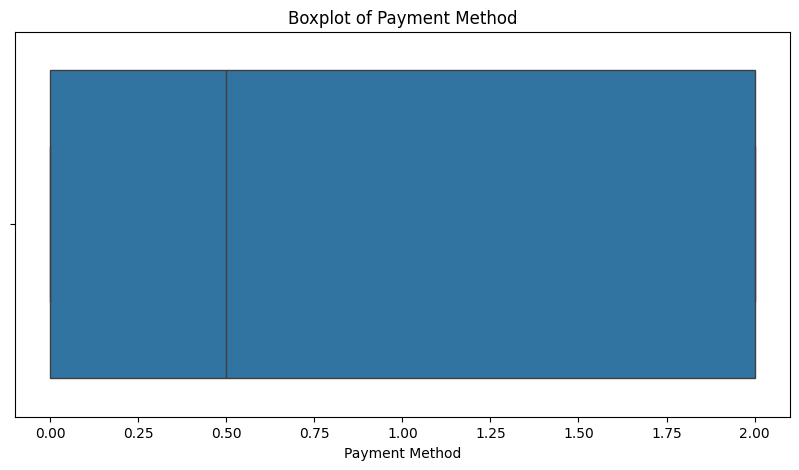

In [ ]:
# Plot boxplots for numerical features
numerical_features = data.select_dtypes(include=['float64', 'int64']).columns

for feature in numerical_features:
    plt.figure(figsize=(10, 5))
    sns.boxplot(x=data[feature])
    plt.title(f'Boxplot of {feature}')
    plt.show()

In [ ]:
# Normalize the data
X_normalized = normalize(data)


In [ ]:
# PCA – Preprocessing
pca = PCA(n_components=2)
X_principal = pca.fit_transform(X_normalized)
X_principal = pd.DataFrame(X_principal, columns=['P1', 'P2'])

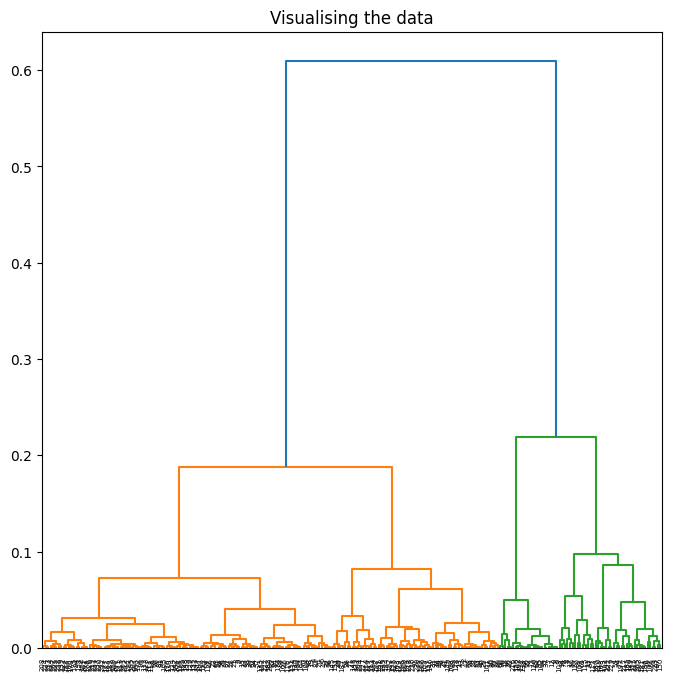

In [ ]:
# Visualizing the data with Dendrogram
plt.figure(figsize=(8, 8))
plt.title('Visualising the data')
Dendrogram = shc.dendrogram((shc.linkage(X_principal, method='ward')))
plt.show()

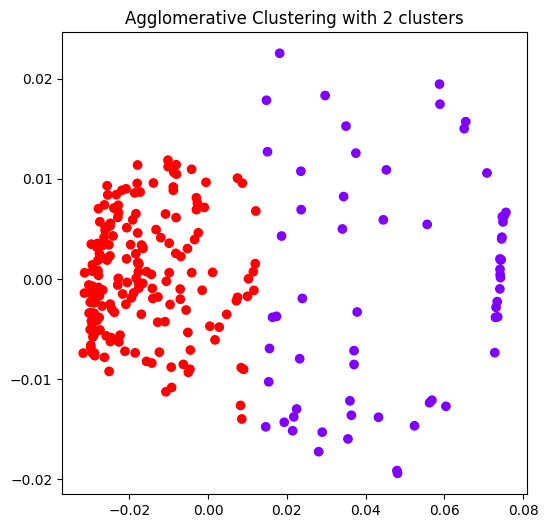

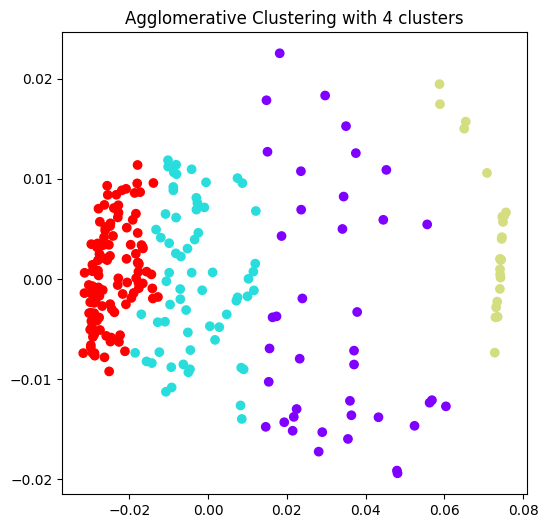

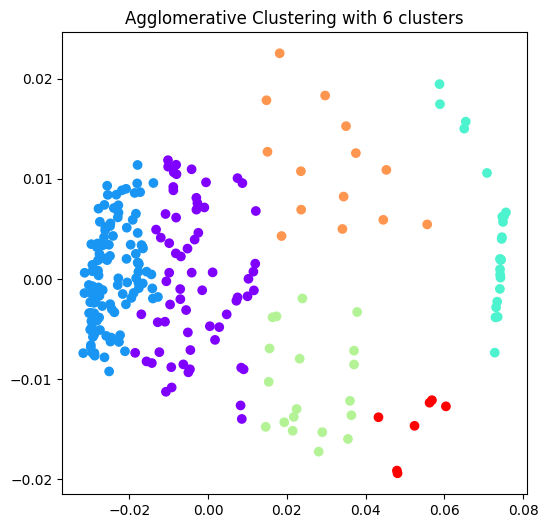

In [ ]:
# Finding best “K” using Scatter plot with various clusters
# Modeling and display for different cluster sizes

cluster_numbers = [2, 4, 6]
silhouette_scores = []

for n_clusters in cluster_numbers:
    ac = AgglomerativeClustering(n_clusters=n_clusters)
    cluster_labels = ac.fit_predict(X_principal)

    plt.figure(figsize=(6, 6))
    plt.scatter(X_principal['P1'], X_principal['P2'], c=cluster_labels, cmap='rainbow')
    plt.title(f'Agglomerative Clustering with {n_clusters} clusters')
    plt.show()

    silhouette_avg = silhouette_score(X_principal, cluster_labels)
    silhouette_scores.append(silhouette_avg)


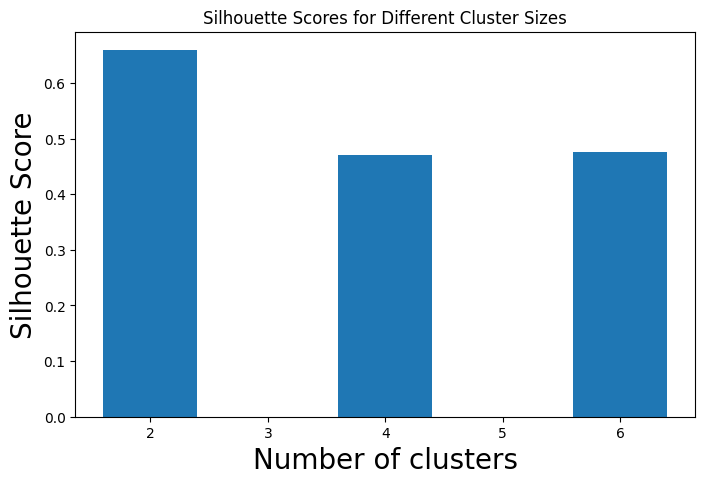

In [ ]:
# Plotting a bar graph to compare the silhouette scores
plt.figure(figsize=(8, 5))
plt.bar(cluster_numbers, silhouette_scores)
plt.xlabel('Number of clusters', fontsize=20)
plt.ylabel('Silhouette Score', fontsize=20)
plt.title('Silhouette Scores for Different Cluster Sizes')
plt.show()